In [1]:
# !scp alfa:learn_to_prime/informative_eval_cleaned.tsv .

In [1]:
import pandas as pd
df = pd.read_csv("informative_eval_all_sample3.tsv", sep="\t", names=["model", "dataset", "prompt", "random_demos", "informative_demos", "difference"])
# temp fix: to be removed
# import itertools
# df["prompt"] = list(itertools.chain(*[[i]*200 for i in range(len(df)//200)]))
df

,model,dataset,prompt,random_demos,informative_demos,difference
0,trained_models/SQuAD+SQAD_hard_base_ch2000,worldtree,no template,0.07,0.06,-0.01
1,trained_models/SQuAD+SQAD_hard_base_ch2000,worldtree,no template,0.07,0.06,-0.01
2,trained_models/SQuAD+SQAD_hard_base_ch2000,worldtree,no template,0.04,0.08,0.04
3,trained_models/SQuAD+SQAD_hard_base_ch2000,worldtree,no template,0.04,0.01,-0.03
4,trained_models/SQuAD+SQAD_hard_base_ch2000,worldtree,no template,0.07,0.05,-0.02
...,...,...,...,...,...,...
995,bigscience/T0pp,worldtree,no template,0.05,0.06,0.01
996,bigscience/T0pp,worldtree,no template,0.06,0.08,0.02
997,bigscience/T0pp,worldtree,no template,0.02,0.06,0.04
998,bigscience/T0pp,worldtree,no template,0.05,0.07,0.02


In [2]:
df.groupby(["model", "dataset", "prompt"]).mean().tail(10)

,,,random_demos,informative_demos,difference
model,dataset,prompt,,,
allenai/mtk-instruct-3b-def-pos,worldtree,no template,0.0671,0.0701,0.0030
allenai/tk-instruct-3b-def-pos,worldtree,no template,0.0218,0.0251,0.0033
allenai/tk-instruct-base-def-pos,worldtree,no template,0.0514,0.0544,0.0030
allenai/tk-instruct-large-def-pos,worldtree,no template,0.0689,0.0684,-0.0005
bigscience/T0_3B,worldtree,no template,0.0234,0.0202,-0.0032
bigscience/T0pp,worldtree,no template,0.0496,0.0521,0.0025
gaussalgo/mt5-large-priming-QA_en-cs,worldtree,no template,0.0106,0.0102,-0.0004
trained_models/AQA+SQAD_random_large_ch6000,worldtree,no template,0.0083,0.0077,-0.0006
trained_models/SQuAD+SQAD_hard_base_ch2000,worldtree,no template,0.0557,0.0576,0.0019


In [4]:
# df.apply(lambda row: str(row["model"]) + str(row["dataset"]), axis=1).value_counts()

In [3]:
max_vals = df.groupby(["model", "dataset", "prompt"]).mean()["informative_demos"].groupby(["model", "dataset"]).idxmax().tolist()
# max_vals.reset_index("prompt")
# max_vals

In [4]:
max_vals

[('allenai/mtk-instruct-3b-def-pos', 'worldtree', 'no template'),
 ('allenai/tk-instruct-3b-def-pos', 'worldtree', 'no template'),
 ('allenai/tk-instruct-base-def-pos', 'worldtree', 'no template'),
 ('allenai/tk-instruct-large-def-pos', 'worldtree', 'no template'),
 ('bigscience/T0_3B', 'worldtree', 'no template'),
 ('bigscience/T0pp', 'worldtree', 'no template'),
 ('gaussalgo/mt5-large-priming-QA_en-cs', 'worldtree', 'no template'),
 ('trained_models/AQA+SQAD_random_large_ch6000', 'worldtree', 'no template'),
 ('trained_models/SQuAD+SQAD_hard_base_ch2000', 'worldtree', 'no template'),
 ('trained_models/SQuAD+SQAD_random_base_ch5000', 'worldtree', 'no template')]

In [5]:
max_info_df = df[df.apply(lambda row: tuple(row[["model", "dataset", "prompt"]]) in max_vals, axis=1)]
max_info_df

,model,dataset,prompt,random_demos,informative_demos,difference
0,trained_models/SQuAD+SQAD_hard_base_ch2000,worldtree,no template,0.07,0.06,-0.01
1,trained_models/SQuAD+SQAD_hard_base_ch2000,worldtree,no template,0.07,0.06,-0.01
2,trained_models/SQuAD+SQAD_hard_base_ch2000,worldtree,no template,0.04,0.08,0.04
3,trained_models/SQuAD+SQAD_hard_base_ch2000,worldtree,no template,0.04,0.01,-0.03
4,trained_models/SQuAD+SQAD_hard_base_ch2000,worldtree,no template,0.07,0.05,-0.02
...,...,...,...,...,...,...
995,bigscience/T0pp,worldtree,no template,0.05,0.06,0.01
996,bigscience/T0pp,worldtree,no template,0.06,0.08,0.02
997,bigscience/T0pp,worldtree,no template,0.02,0.06,0.04
998,bigscience/T0pp,worldtree,no template,0.05,0.07,0.02


In [6]:
max_info_df.model.unique()

array(['trained_models/SQuAD+SQAD_hard_base_ch2000',
       'trained_models/SQuAD+SQAD_random_base_ch5000',
       'trained_models/AQA+SQAD_random_large_ch6000',
       'gaussalgo/mt5-large-priming-QA_en-cs',
       'allenai/tk-instruct-base-def-pos',
       'allenai/tk-instruct-large-def-pos',
       'allenai/tk-instruct-3b-def-pos',
       'allenai/mtk-instruct-3b-def-pos', 'bigscience/T0_3B',
       'bigscience/T0pp'], dtype=object)

In [7]:
random_portion_df = max_info_df.copy()
del random_portion_df["informative_demos"]
random_portion_df["acc"] = random_portion_df["random_demos"]
random_portion_df["type"] = "random"

del random_portion_df["random_demos"]

info_portion_df = max_info_df.copy()
del info_portion_df["random_demos"]
info_portion_df["acc"] = info_portion_df["informative_demos"]
info_portion_df["type"] = "info"

del info_portion_df["informative_demos"]

joint_df = pd.concat([random_portion_df, info_portion_df])

<AxesSubplot:xlabel='model', ylabel='acc'>

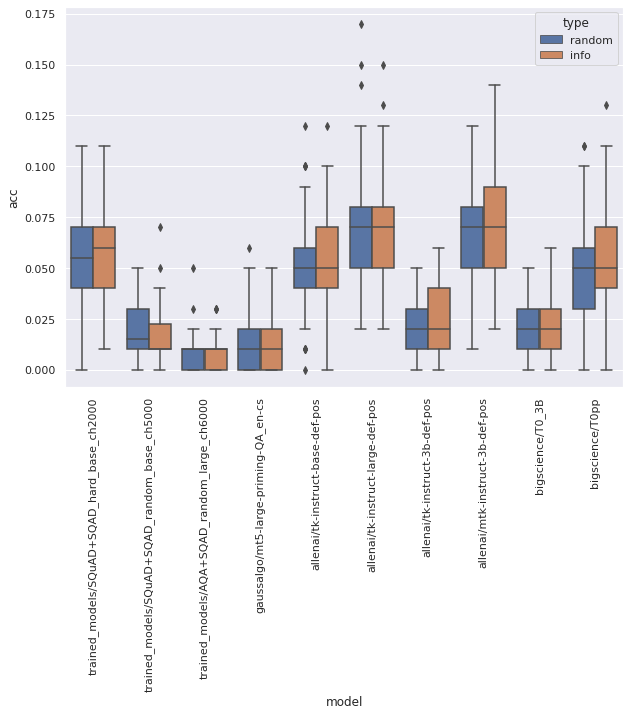

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.xticks(rotation=90)

sns.set(rc={'figure.figsize': (10, 7)})
sns.boxplot(data=joint_df[joint_df["dataset"] == "worldtree"], x="model", y="acc", hue="type", conf_intervals=[(-0.05, 0.05)])

<AxesSubplot:xlabel='model', ylabel='acc'>

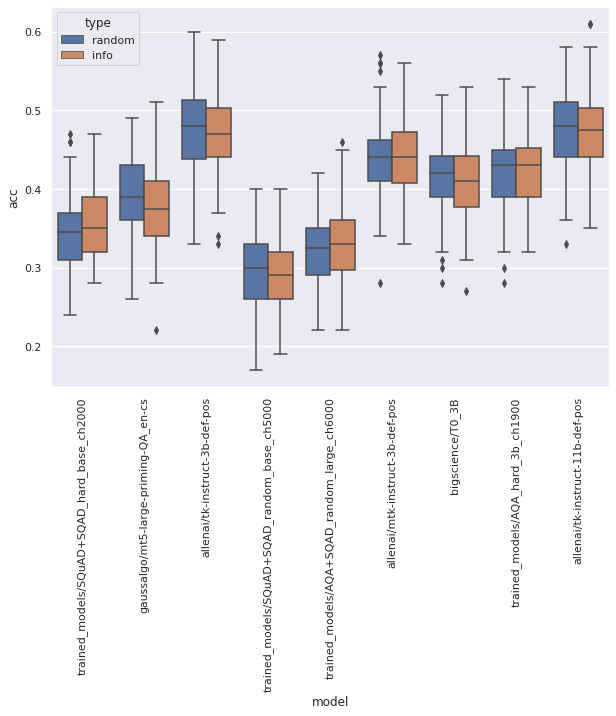

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.xticks(rotation=90)

sns.set(rc={'figure.figsize': (10, 7)})
sns.boxplot(data=joint_df[joint_df["dataset"] == "glue/mnli"], x="model", y="acc", hue="type", conf_intervals=[(-0.05, 0.05)])

<AxesSubplot:xlabel='model', ylabel='acc'>

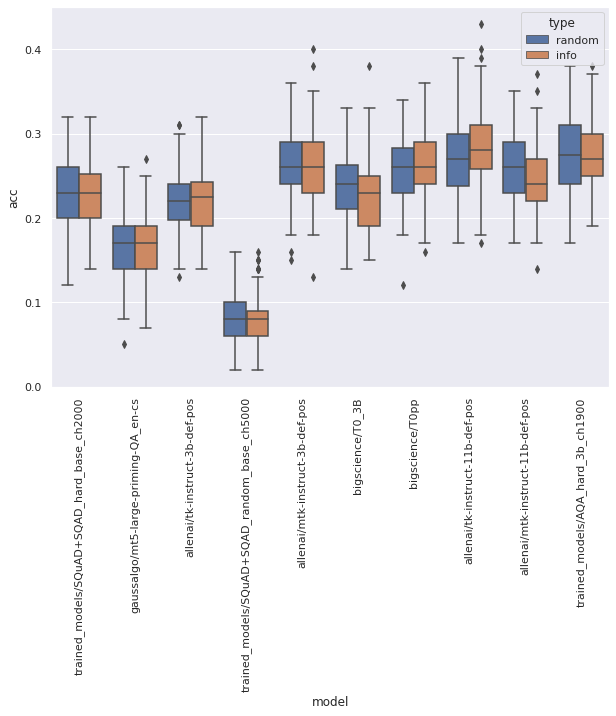

In [13]:
plt.xticks(rotation=90)
sns.boxplot(data=joint_df[joint_df["dataset"] == "openbookqa/additional"], x="model", y="acc", hue="type", conf_intervals=[(-0.05, 0.05)])

<AxesSubplot:xlabel='model', ylabel='acc'>

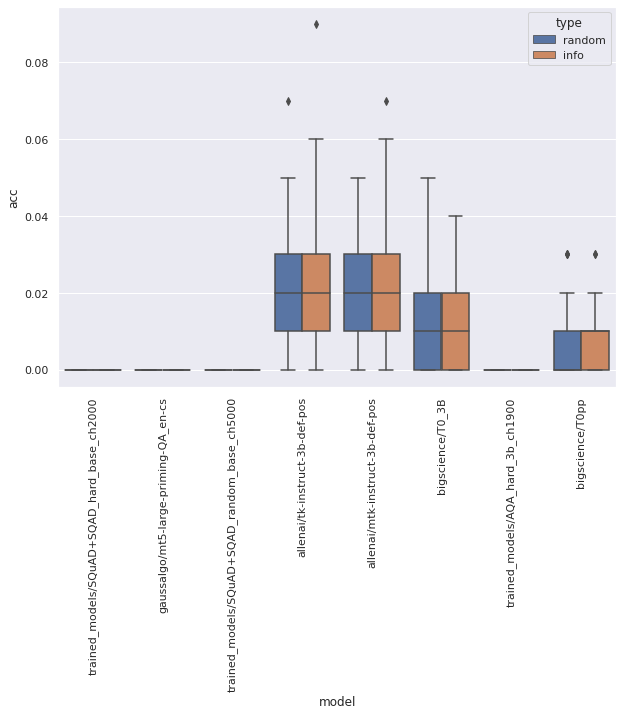

In [11]:
plt.xticks(rotation=90)
sns.boxplot(data=joint_df[joint_df["dataset"] == "hotpot_qa/fullwiki"], x="model", y="acc", hue="type", conf_intervals=[(-0.05, 0.05)])